# <FONT COLOR = 'PURPLE' SIZE = 63><CENTER> LEAD SCORE CASE </FONT></CENTER>

#### <FONT SYLE = 'SERIFF' COLOR = 'RED' > PROBLEM STATEMENT </FONT> <BR>
    
<P> X Education, an online education company, faces the challenge of improving its lead conversion rate, which currently stands at approximately 30%. To increase efficiency and maximize resources, the company aims to identify 'Hot Leads,' those with the highest likelihood of converting into paying customers. The goal is to develop a lead scoring model that assigns scores to leads, enabling the sales team to prioritize their efforts on the most promising leads, ultimately increasing the lead conversion rate to the CEO's target of around 80%. </P>

#### <FONT SYLE = 'SERIFF' COLOR = 'RED' > GOAL </FONT> <BR>
    
- Develop a logistic regression model.
- Assign lead scores (ranging from 0 to 100) to incoming leads.
- Enable the sales team to prioritize leads based on these scores.
- Increase the lead conversion rate through more effective lead management and targeting.





#### <FONT SYLE = 'SERIFF' COLOR = 'RED' > STEPS UNDERTAKEN </FONT> <BR>  

1. Data importation
2. Data cleaning
3. Univariate Analysis
4. Bivariate Analysis
5. Preparing the data for modelling
6. Model Building
7. Model Evaluation  
8. Model Validation 

#   <FONT COLOR = 'BROWN' >1. DATA IMPORTATION </FONT>

In [1]:
# importing necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing library for test_train split
from sklearn.model_selection import train_test_split

# importing library for standardisation 
from sklearn.preprocessing import StandardScaler

# importing library for model building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# importing library for RFE
from sklearn.feature_selection import RFE

# importing library for variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# libraries for evaluating the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the csv file
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of the dataframe
lead.shape
# there are 9240 rows and 37 columns

(9240, 37)

In [5]:
# find the duplicated rows
lead.duplicated().sum()
# no rows are duplicated

0

In [6]:
# getting info about the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#   <FONT COLOR = 'BROWN' >2. DATA CLEANING </FONT>

In [7]:
# find the number of null rows in the dataframe
lead.isna().sum()/len(lead)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

##### NOTES
1. Identified that there are many rows having more than 25% of missing values.
2. Decided to eliminate those columns

In [8]:
# identifying those rows having more than 25% of missing values
x = lead.isna().sum()/len(lead)*100
missing_25 = list(x[x > 25].index)
missing_25

['Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
# dropping the above columns 
lead.drop(missing_25 , axis =1 , inplace = True)

In [10]:
# checking the shape of dataframe
lead.shape

(9240, 27)

In [11]:
# analysing columns having more than 15% missing
x = lead.isna().sum()/len(lead)*100
x[x > 15 ]


Specialization                        15.562771
How did you hear about X Education    23.885281
City                                  15.367965
dtype: float64

In [12]:
# specialization column
lead.Specialization.value_counts(normalize= True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

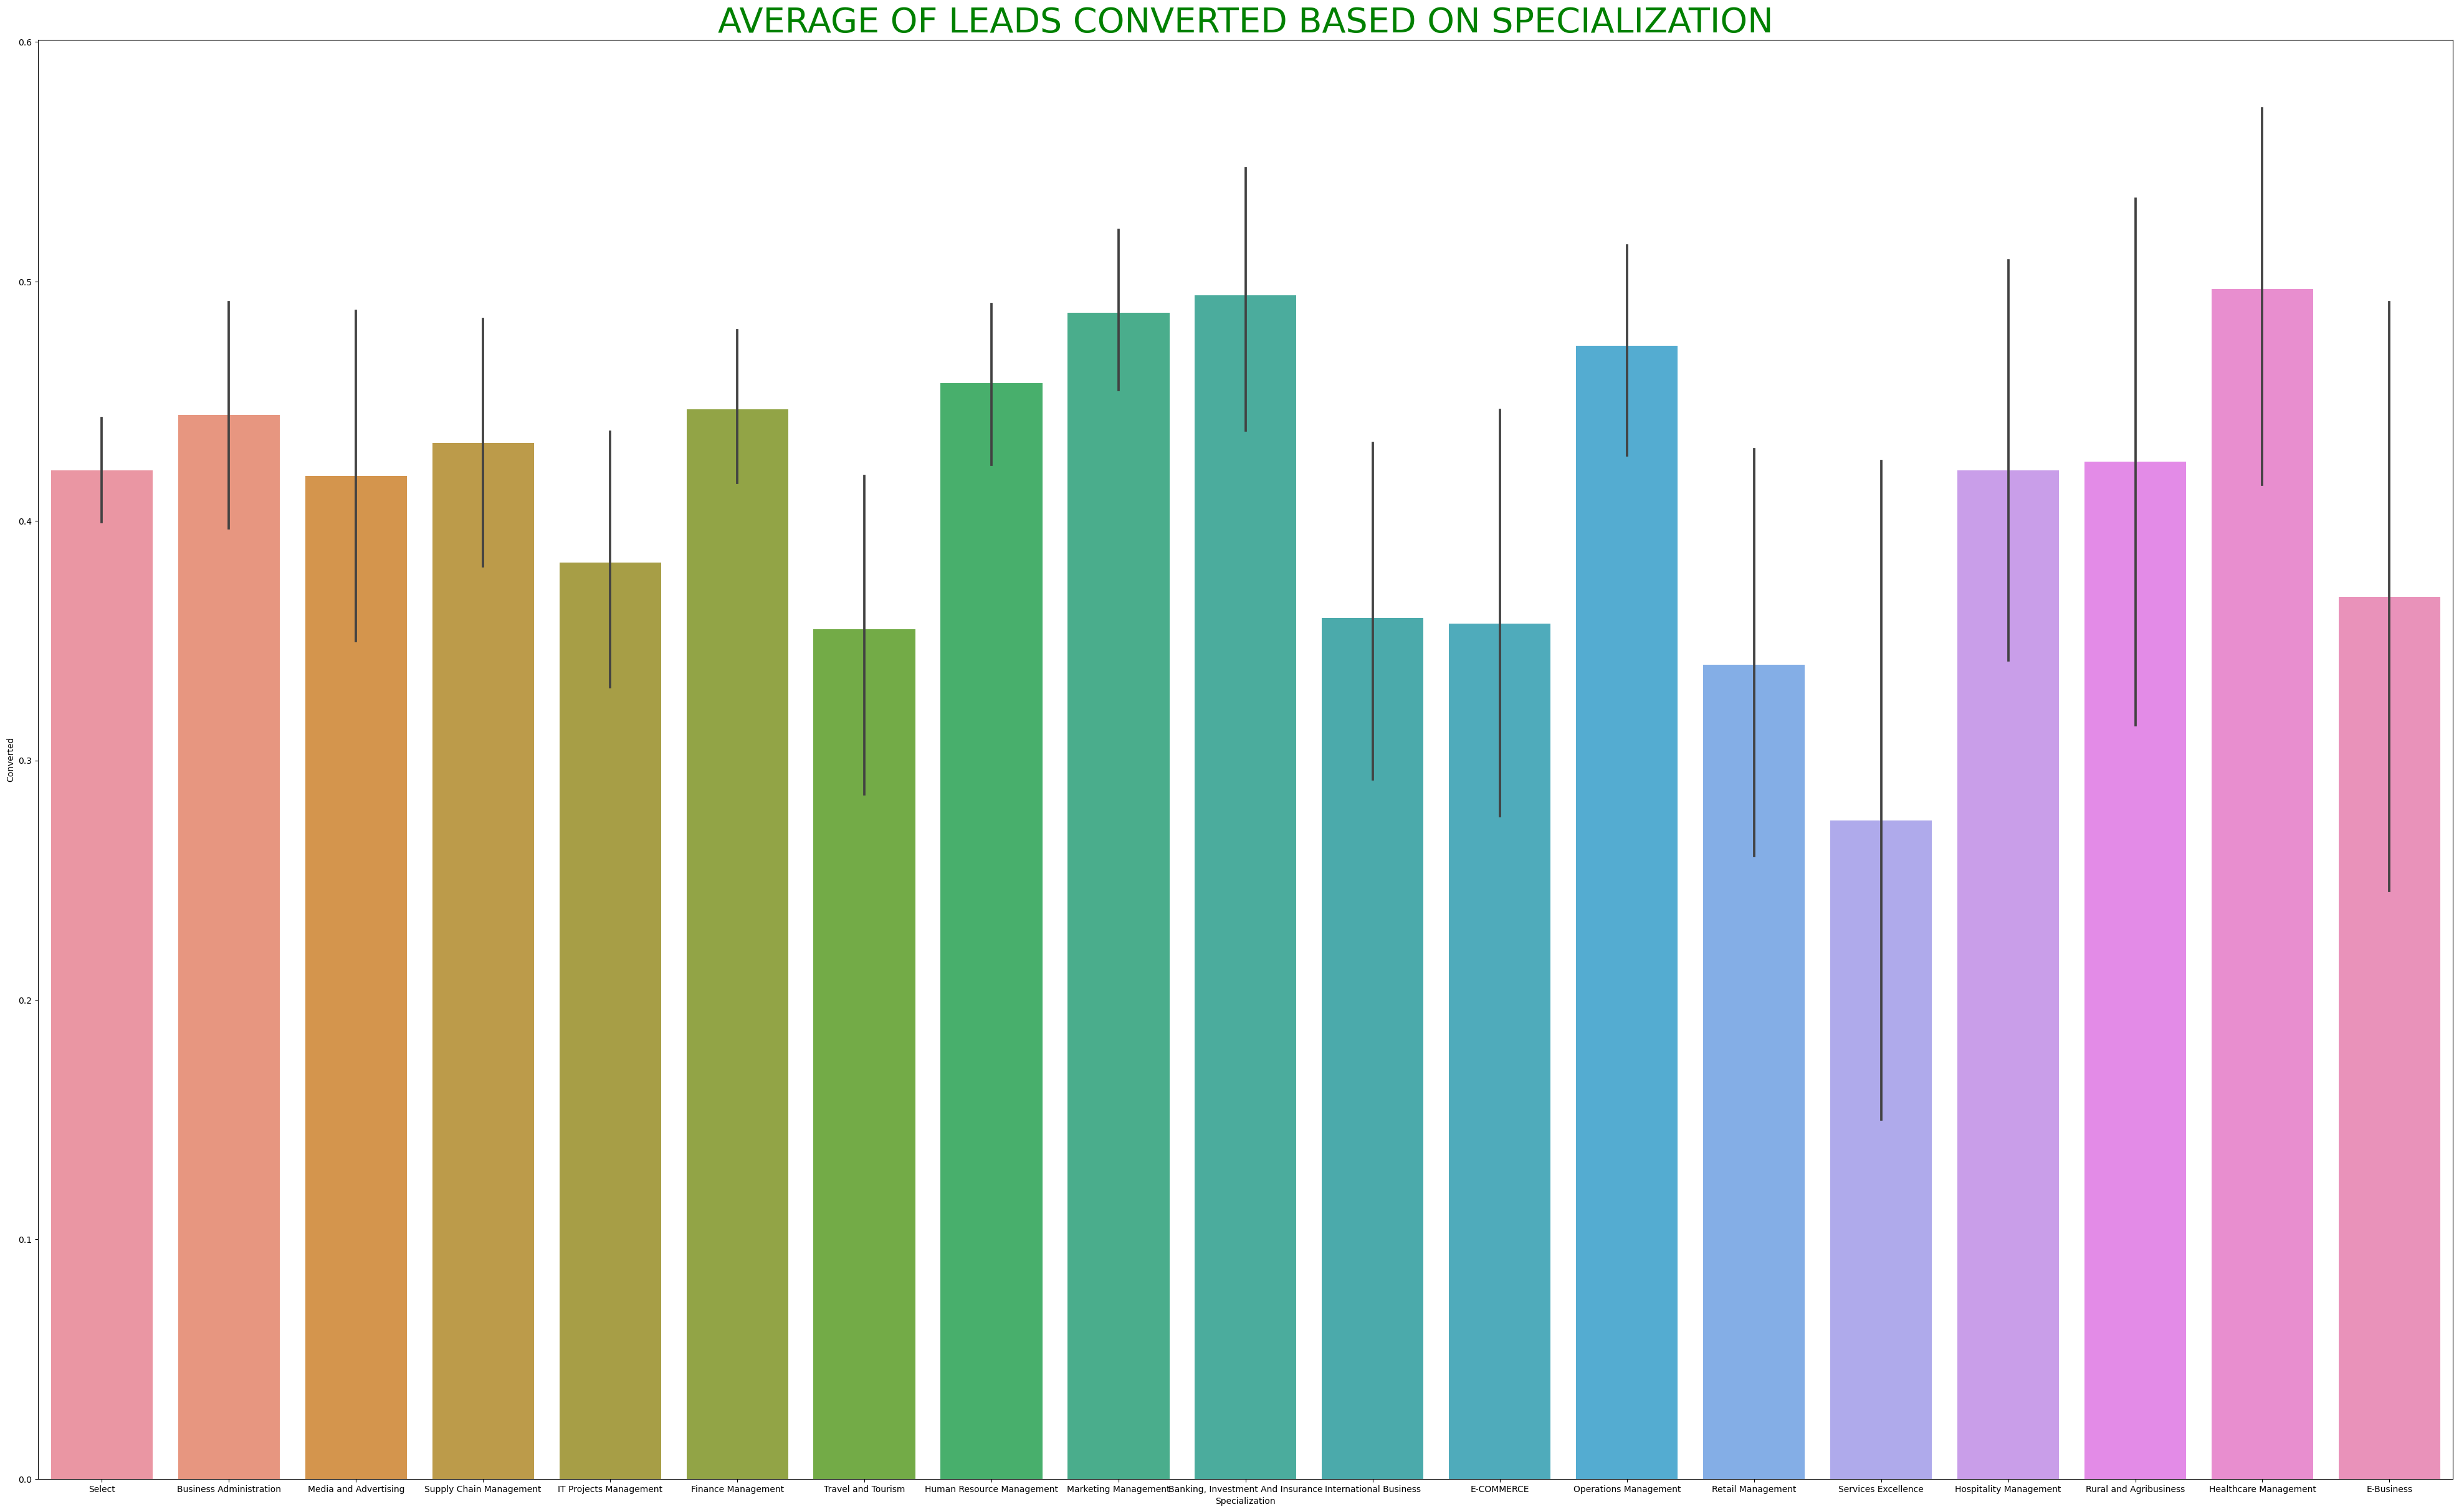

In [13]:
# developing a mean of converted chart based on city
plt.figure(figsize = (50,30))
sns.barplot(x = 'Specialization' , y = 'Converted' , data = lead ,estimator = np.mean )
plt.title('AVERAGE OF LEADS CONVERTED BASED ON SPECIALIZATION' , fontdict = {'color' :'green' , 'size' : 40})
plt.show()

##### NOTES
1. About 24% of Specialization column consist of 'Select' variable which is as good as 'null Values'
2. It can be noticed that there is a significant drop in average conversion among those who have left the column blank and those from service excellence industry.

##### ACTION

Converting null values to 'Select'

In [14]:
lead.Specialization.fillna('Select' , inplace = True )

In [15]:
# How did you head about X education column
lead['How did you hear about X Education'].value_counts(normalize= True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

##### NOTES
1. Noticed more than 71% of the 'How did you head about X education' column have 'Select' as a value which is as good as null value.
2. Decided to drop the column

In [16]:
# dropping the column 'How did you hear about X Education'
lead.drop('How did you hear about X Education'  , axis =1 , inplace = True)

In [17]:
# city column
lead.City.value_counts(normalize= True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

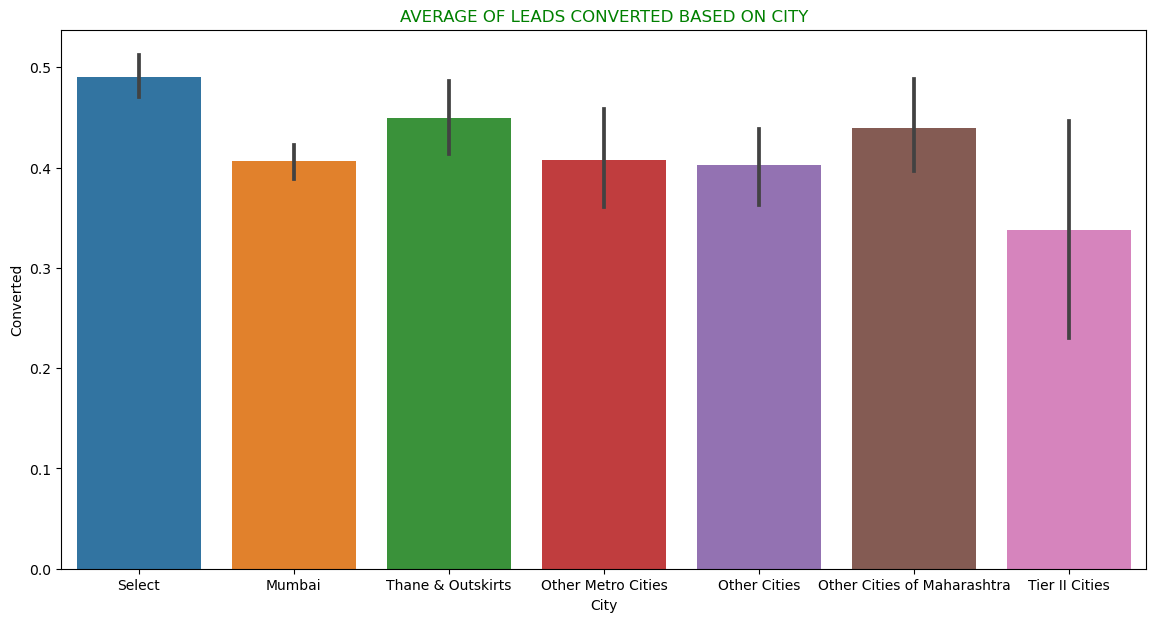

In [18]:
# developing a mean of converted chart based on city
plt.figure(figsize = (14,7))
sns.barplot(x = 'City' , y = 'Converted' , data = lead ,estimator = np.mean )
plt.title('AVERAGE OF LEADS CONVERTED BASED ON CITY' , fontdict = {'color' :'green'})
plt.show()

##### NOTES
1. More percentage conversion is for select category compared to all other category
2. The average conversion is constant across Mumbai
3. Lowest average conversion is from Tier II cities which constitute only 1% of all potential leads

##### ACTION

Remove the column as no useful insight can be derived from it


In [19]:
# dropping the column 'City'
lead.drop('City' , axis = 1 , inplace = True)

In [20]:
# Checking on the missing values of lead
lead.isna().sum()/len(lead)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.

In [21]:
# Anlaysing lead source column
lead['Lead Source'].value_counts(normalize = True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

##### NOTES
1. More than 30% of the lead is received from the Google 

##### ACTION
Filling the missing values with 'Google'

In [22]:
lead['Lead Source'].fillna('Google' , inplace = True)

In [23]:
# Analysing Total Visits column
lead['TotalVisits'].value_counts(normalize= True)


0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype: float64

##### ACTION
decided to drop those rows with null values

In [24]:
# dropping rows with null values 
lead = lead[~lead['TotalVisits'].isna()]

In [25]:
# Checking on the missing values of lead
lead.isna().sum()/len(lead)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [26]:
# checking the shape of lead
lead.shape

(9103, 25)

In [27]:
# getting the information about the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9103 non-null   object 
 1   Lead Number                               9103 non-null   int64  
 2   Lead Origin                               9103 non-null   object 
 3   Lead Source                               9103 non-null   object 
 4   Do Not Email                              9103 non-null   object 
 5   Do Not Call                               9103 non-null   object 
 6   Converted                                 9103 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9103 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

#   <FONT COLOR = 'BROWN' >3. UNIVARIATE ANALYSIS  </FONT>

In [28]:
# ANALYSING PROSPECT ID AND LEAD NUMBER COLUMNS
columns = ['Prospect ID'  , 'Lead Number' ]
for i in columns :
    print(i , end = '\n')
    print (lead[i].duplicated().sum())

Prospect ID
0
Lead Number
0


##### ACTION
dropping the columns 'Prospect ID' and 'Lead Number' as it does not add value to analysis

In [29]:
# dropping the columns 
lead.drop(['Prospect ID' , 'Lead Number'] ,axis = 1, inplace = True)

In [30]:
# ANALYSING LEAD ORIGIN
lead['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64

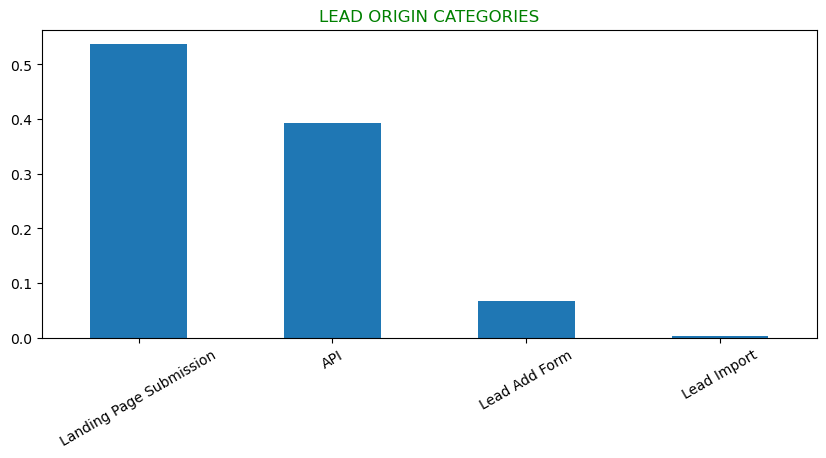

In [31]:
lead['Lead Origin'].value_counts(normalize = True).plot(kind = 'bar' , figsize = (10,4))
plt.title('LEAD ORIGIN CATEGORIES' , fontdict = {'color' :'green'})
plt.xticks(rotation = 30)
plt.show()

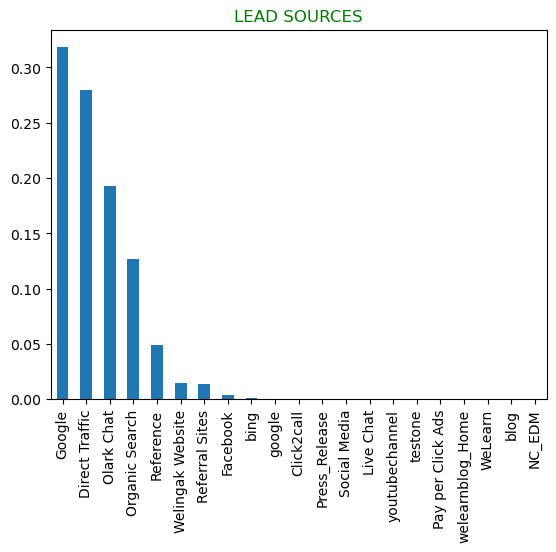

In [32]:
# ANALYSING LEAD SOURCE
lead['Lead Source'].value_counts(normalize= True).plot(kind = 'bar')
plt.title('LEAD SOURCES' , fontdict = {'color' :'green'})
plt.show()

In [33]:
# ANALYSING DO NOT EMAIL
lead['Do Not Email'].value_counts(normalize = True)

No     0.920466
Yes    0.079534
Name: Do Not Email, dtype: float64

In [34]:
# ANALYSING DO NOT CALL
lead['Do Not Call'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

##### NOTES 
1. About 8% of customers have selected 'Do not Email' option
2. About 99.9% of customers have selected 'Do not call' option.

##### ACTION
Decided to drop the column 'Do Not Call' as it does not add value to the model.

In [35]:
# dropping the columns 
lead.drop(['Do Not Call'] ,axis = 1, inplace = True)

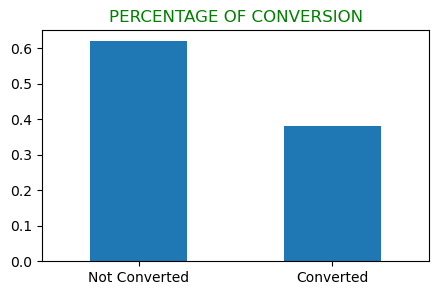

In [36]:
# ANALYSING CONVERTED COLUMN
# This will provide the imformation regarding data imbalance
lead.Converted.map({0 : 'Not Converted' , 1 : 'Converted'}).value_counts(normalize= True).plot(kind = 'bar' , figsize = (5,3))
plt.title('PERCENTAGE OF CONVERSION' , fontdict = {'color' :'green'})
plt.xticks(rotation = 0)
plt.show()

In [37]:
# ANALYSING TOTAL VISITS
lead['TotalVisits'].value_counts(normalize = True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype: float64

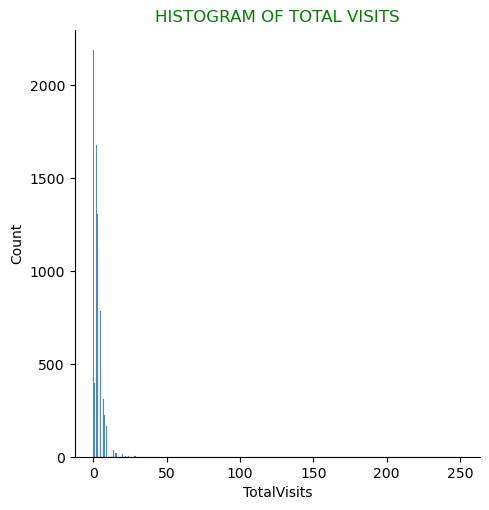

In [38]:
# showing histogram of time spent
sns.displot(lead['TotalVisits'])
plt.title('HISTOGRAM OF TOTAL VISITS' , fontdict = {'color' :'green'})
plt.show()

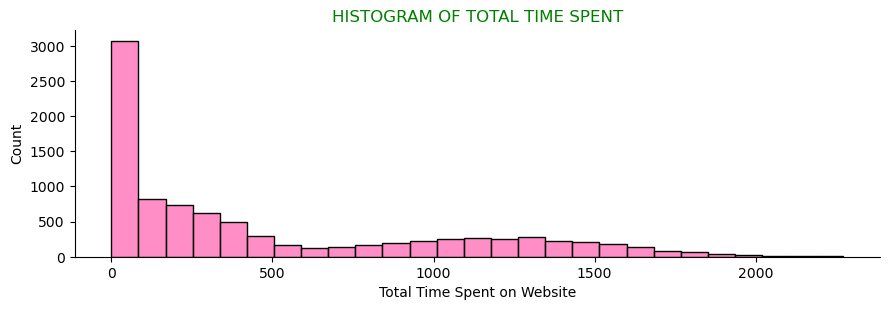

In [39]:
# ANALYSING TOTAL TIME SPENT ON WEBSITE    
# Histogram

sns.displot(lead['Total Time Spent on Website'] , color = 'hotpink' ,height = 3  , aspect = 3 )
plt.title('HISTOGRAM OF TOTAL TIME SPENT' , fontdict = {'color' :'green'})
plt.show()

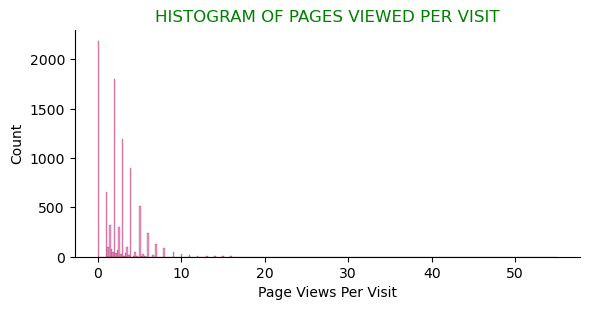

In [40]:
# ANALYSING PAGE VIEWS PER VISIT
sns.displot(lead['Page Views Per Visit'] , color = 'hotpink' ,height = 3  , aspect = 2  , )
plt.title('HISTOGRAM OF PAGES VIEWED PER VISIT' , fontdict = {'color' :'green'})
plt.show()

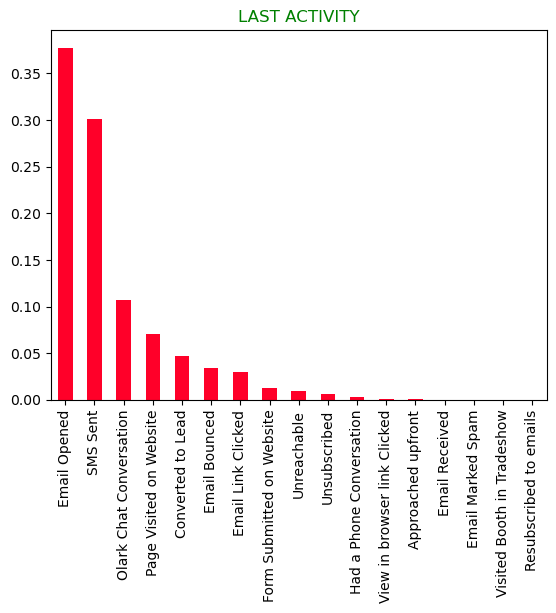

In [41]:
# ANALYSING LAST ACTIVITY
lead['Last Activity'].value_counts(normalize = True).plot(kind= 'bar' , colormap = 'gist_rainbow')
plt.title('LAST ACTIVITY' , fontdict = {'color' :'green'})
plt.show()

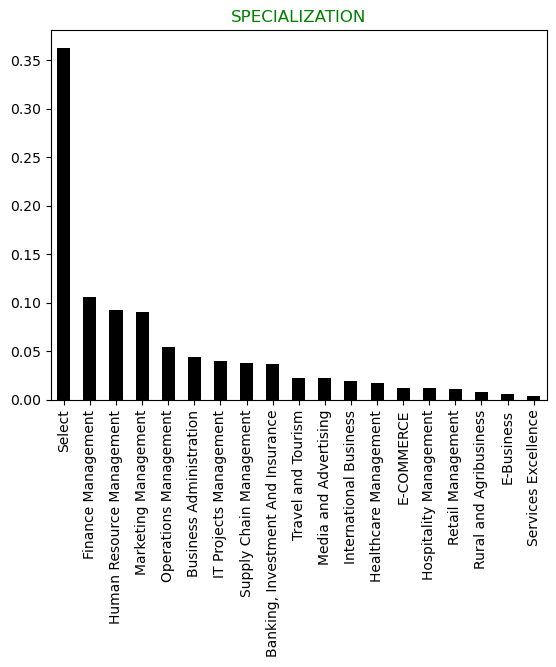

In [42]:
# ANALYSING SPECIALIZATION COLUMN
lead['Specialization'].value_counts(normalize = True).plot(kind= 'bar' , colormap = 'gist_stern')
plt.title('SPECIALIZATION' , fontdict = {'color' :'green'})
plt.show()

In [43]:
# ANALYSING SEARCH , MAGAZINE , NEWSPAPER ARTICLE , X EDUCATION FORUM , NEWSPAPER COLUMN ,DIGITAL ADVERTISEMENT COLUMN
columns = ['Search','Magazine' ,'Newspaper Article' ,'X Education Forums' ,'Newspaper' , 'Digital Advertisement']
for i in columns :
    print(i , end = '\n')
    print (lead[i].value_counts(normalize= True))
    print('\n')

Search
No     0.998462
Yes    0.001538
Name: Search, dtype: float64


Magazine
No    1.0
Name: Magazine, dtype: float64


Newspaper Article
No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64


X Education Forums
No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64


Newspaper
No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64


Digital Advertisement
No     0.999561
Yes    0.000439
Name: Digital Advertisement, dtype: float64




##### NOTES 
1. About 99.8% of customers have selected 'No' option in search column
2. All of customers have selected 'No' option in Magazine column.
3. About 99.98% of customers have selected 'No' option in Newspaper Article column.
4. About 99.99% of customers have selected 'No' option in X Education Forums column.
5. About 99.99% of customers have selected 'No' option in Newspaper column.
6. About 99.99% of customers have selected 'No' option in Digital Advertisement.


##### ACTION
Decided to drop all the above column, as it does not add value to the model.

In [44]:
# dropping the columns 
lead.drop( columns ,axis = 1, inplace = True)

In [45]:
# detting information regarding the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   Through Recommendations                   9103 non-null   object 
 10  Receive More Updates About Our Cours

In [46]:
# ANALYSING THROUGH RECOMMENDATION, RECEIVE MORE UPDATES ABOUT OUR COURSES ,  UPDATE ME ON SPPLY CHAIN CONTENT, 
# ANALYSING  GET UPDATE ON DM CONTENT , I AGREE TO PAY THE AMOUNT THROUGH CHEQUE
columns = ['Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content' , 
          'Get updates on DM Content' , 'I agree to pay the amount through cheque' ]
for i in columns :
    print(i , end = '\n')
    print (lead[i].value_counts(normalize= True))
    print('\n')


Through Recommendations
No     0.999231
Yes    0.000769
Name: Through Recommendations, dtype: float64


Receive More Updates About Our Courses
No    1.0
Name: Receive More Updates About Our Courses, dtype: float64


Update me on Supply Chain Content
No    1.0
Name: Update me on Supply Chain Content, dtype: float64


Get updates on DM Content
No    1.0
Name: Get updates on DM Content, dtype: float64


I agree to pay the amount through cheque
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64




##### NOTES 
1. About 99.9% of customers are not through recommendation.
2. All  customers do not want to receive more updates about their courses.
3. All  customers do not want to receive updates on supply chain content.
4. All  customers do not want to receive updates on DM content.
5. All  customers do not agree to pay the amount through cheque.

##### ACTION
Decided to drop all the above column, as it does not add value to the model.

In [47]:
# dropping the columns 
lead.drop( columns ,axis = 1, inplace = True)

In [48]:
# ANALYSING A FREE COPY OF MASTERING THE INTERVIEW COLUMN
lead['A free copy of Mastering The Interview'].value_counts(normalize = True)

No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64

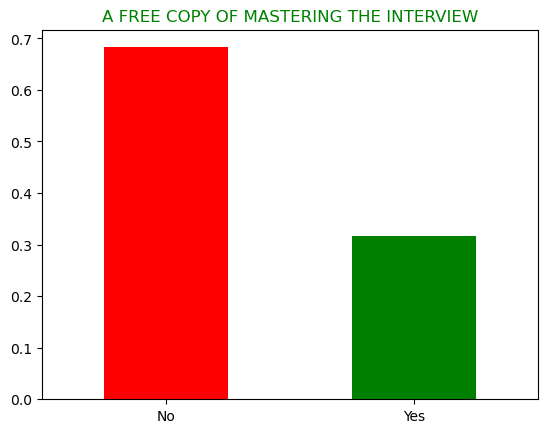

In [49]:
# bar plot of distribution 
lead['A free copy of Mastering The Interview'].value_counts(normalize = True).plot(kind = 'bar'  , color = ['r', 'g'])
plt.title('A FREE COPY OF MASTERING THE INTERVIEW' , fontdict = {'color' :'green'})

plt.xticks(rotation = 0)
plt.show()

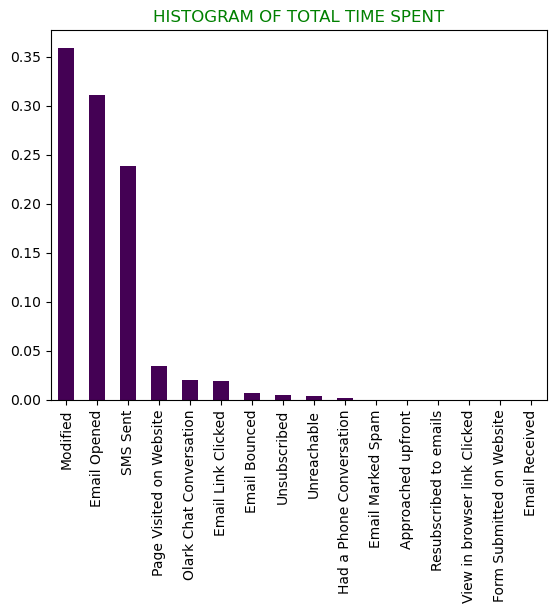

In [50]:
# ANALYSING LAST NOTABLE ACTIVITY COLUMN
lead['Last Notable Activity'].value_counts(normalize= True).plot(kind = 'bar' , cmap = 'viridis'   )
plt.title('HISTOGRAM OF TOTAL TIME SPENT' , fontdict = {'color' :'green'})
plt.show()

In [51]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   A free copy of Mastering The Interview  9103 non-null   object 
 10  Last Notable Activity                   9103 non-null   obje

##### NOTES
1. A substantial 60% of leads originate from landing page submissions, emphasizing the importance of optimizing landing page strategies.
2. Google serves as a dominant lead traffic source, contributing to more than 30% of the leads received.
3. A significant data imbalance is observed, with 60% of leads not converting and the remaining 40% successfully converting.
4. About 35% of leads have left the specialization column blank, possibly indicating diverse or unspecified fields of interest.
5. Several columns, including 'Search,' 'Magazine,' 'Newspaper article,' 'X Education Forum,' 'Newspaper,' 'Digital Advertisement,' and 'Through Recommendations,' were removed due to extreme data imbalance, streamlining the dataset for analysis.


#   <FONT COLOR = 'BROWN' >4. BIVARIATE ANALYSIS  </FONT>

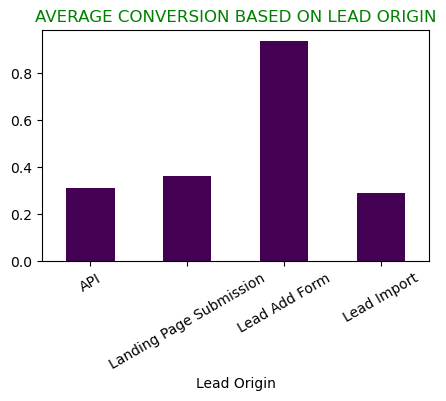

In [52]:
# ANALYSING RELATION BETWEEN LEAD ORIGIN AND CONVERTED
plt.figure(figsize = (5,3))
lead.groupby(by = ['Lead Origin']).mean()['Converted'].plot(kind = 'bar' , colormap = 'viridis')
plt.title('AVERAGE CONVERSION BASED ON LEAD ORIGIN' , fontdict = {'color': 'green'})
plt.xticks(rotation = 30)
plt.show()

##### NOTE 
1. A significant increase in average conversion can be found where the lead origin is from Lead Add Form

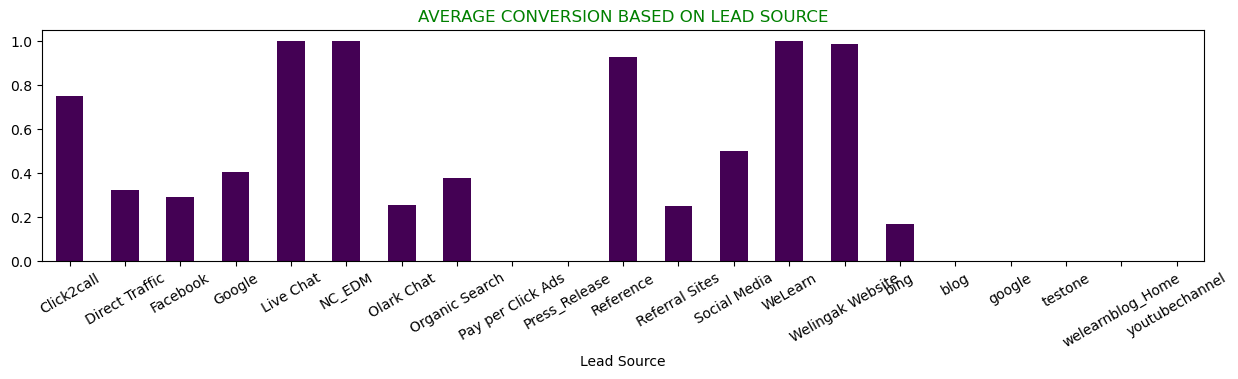

In [53]:
# ANALYSING RELATION BETWEEN LEAD SOURCE AND CONVERTED
plt.figure(figsize = (15,3))
lead.groupby(by = ['Lead Source']).mean()['Converted'].plot(kind = 'bar' , colormap = 'viridis')
plt.title('AVERAGE CONVERSION BASED ON LEAD SOURCE' , fontdict = {'color': 'green'})
plt.xticks(rotation = 30)
plt.show()

##### NOTE 
1. Very high average conversion can be found in cases where lead origin are from Live Chat, NC_EDM ,Reference , WeLearn and Welingak Website.

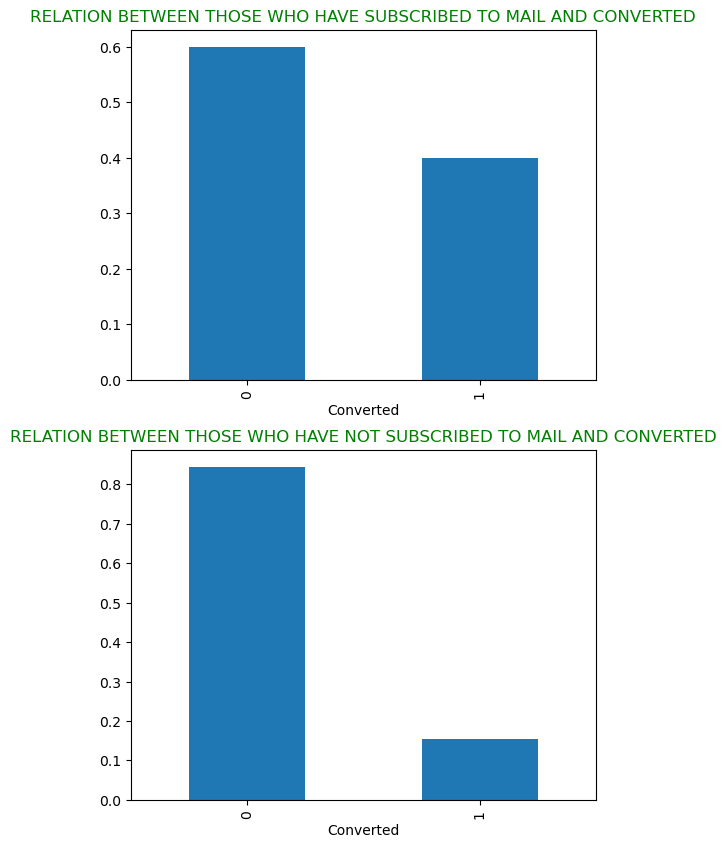

In [54]:
# ANALYSING RELATION BETWEEN DO NOT EMAIL AND CONVERSION RATE
data = lead.groupby(by = ['Do Not Email' ,'Converted' ]).count()['Lead Origin']/lead.groupby(by = ['Do Not Email' ]).count()['Lead Origin']
plt.figure(figsize = (6,10))
plt.subplot(2,1,1)

data.loc[('No')].plot(kind = 'bar')
plt.title('RELATION BETWEEN THOSE WHO HAVE SUBSCRIBED TO MAIL AND CONVERTED' , fontdict = {'color': 'green'})


plt.subplot(2,1,2)
data.loc[('Yes')].plot(kind = 'bar')
plt.title('RELATION BETWEEN THOSE WHO HAVE NOT SUBSCRIBED TO MAIL AND CONVERTED' , fontdict = {'color': 'green'})
plt.show()

##### NOTE
1. Conversion is more among those who have subscribed to mail than among those who have not subscribed to mail.

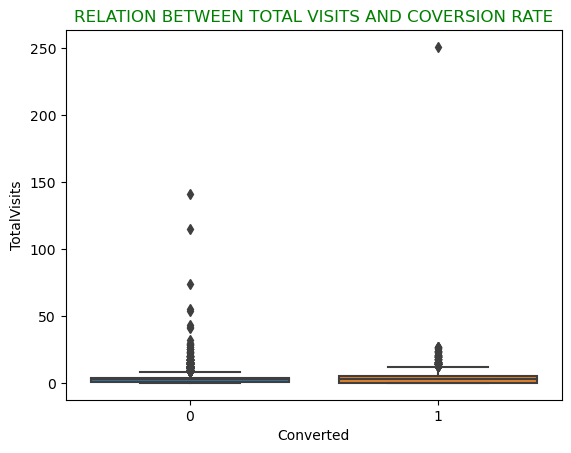

In [55]:
# ANALYSING RELATION BETWEEN TOTAL VISITS AND COVERSION RATE
sns.boxplot(  y = lead['TotalVisits'] , x  = lead['Converted']  )
plt.title('RELATION BETWEEN TOTAL VISITS AND COVERSION RATE' , fontdict = {'color': 'green'})
plt.show()

##### NOTE 
1. There is couple of outliers in the column TotalVisits

##### ACTION 
Remove rows with Page Views Per Visit > 15

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

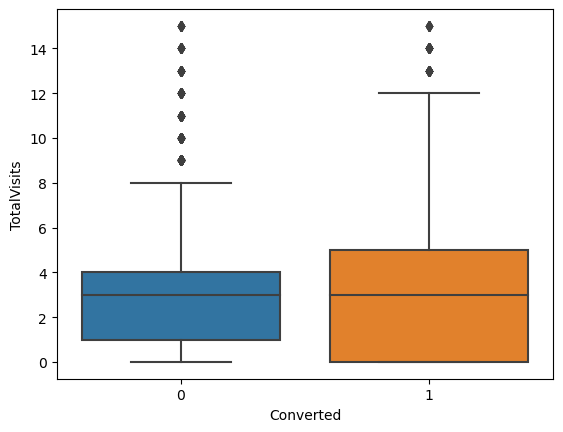

In [56]:
sns.boxplot(  y = lead[lead['TotalVisits'] <= 15 ]['TotalVisits'] ,   x  = lead['Converted']  )

In [57]:
len(lead[lead['TotalVisits'] <= 15 ])

8983

In [58]:
lead = lead[lead['TotalVisits'] <= 15 ]

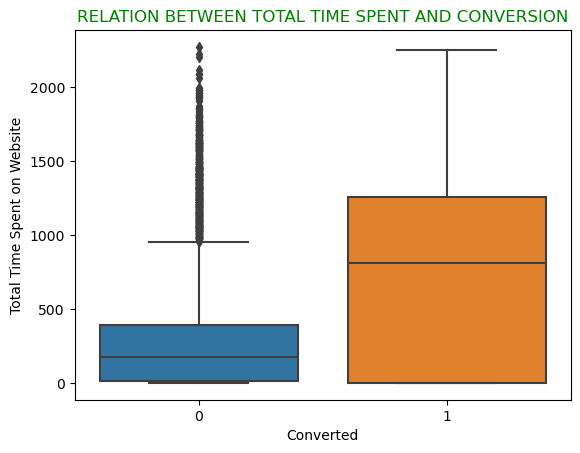

In [59]:
# ANALYSING RELATION BETWEEN TOTAL TIME SPENT ON PAGE AND COVERSION RATE
sns.boxplot(  y = lead['Total Time Spent on Website'] , x  = lead['Converted']  )
plt.title('RELATION BETWEEN TOTAL TIME SPENT AND CONVERSION'  ,fontdict = {'color': 'green'} )
plt.show()

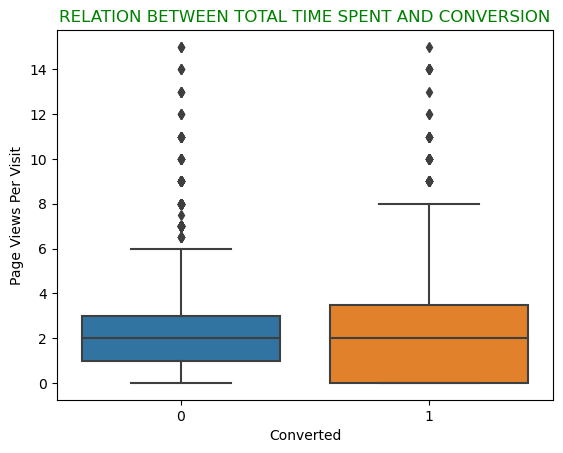

In [60]:
# ANALYSING RELATION BETWEEN PAGE VIEWS AND COVERSION RATE
sns.boxplot(  y = lead['Page Views Per Visit'], x  = lead['Converted']  )
plt.title('RELATION BETWEEN TOTAL TIME SPENT AND CONVERSION'  ,fontdict = {'color': 'green'} )
plt.show()

##### NOTE 
1. There is couple of outliers in the column Page Views Per Visit

##### ACTION 
Remove rows with Page Views Per Visit > 8

In [61]:
lead = lead[lead['Page Views Per Visit']   <= 8 ]
lead.shape

(8874, 11)

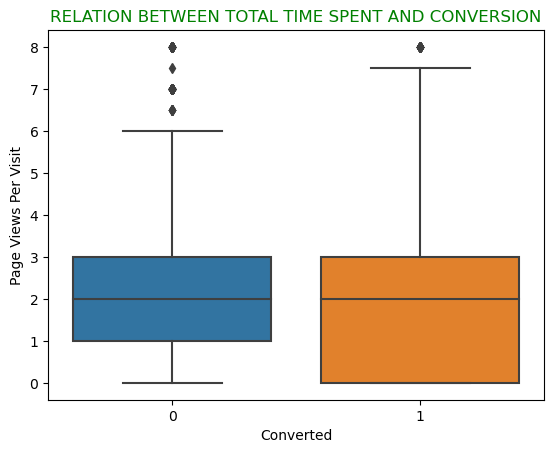

In [62]:
sns.boxplot(  y = lead['Page Views Per Visit'], x  = lead['Converted']  )
plt.title('RELATION BETWEEN TOTAL TIME SPENT AND CONVERSION'  ,fontdict = {'color': 'green'} )
plt.show()

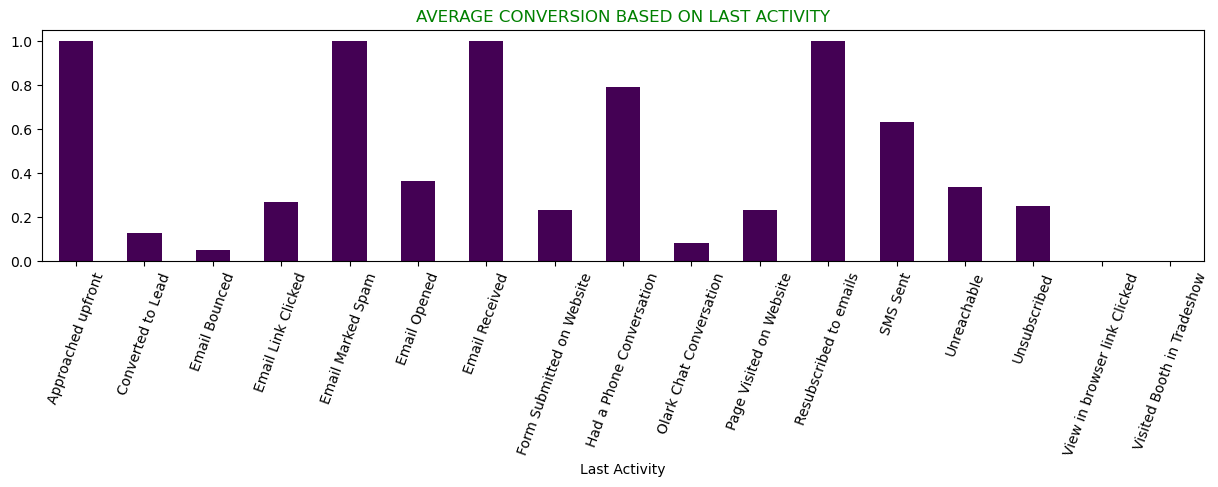

In [63]:
# ANALYSING RELATION BETWEEN LEAD SOURCE AND CONVERTED
plt.figure(figsize = (15,3))
lead.groupby(by = ['Last Activity']).mean()['Converted'].plot(kind = 'bar' , colormap = 'viridis')
plt.title('AVERAGE CONVERSION BASED ON LAST ACTIVITY' , fontdict = {'color': 'green'})
plt.xticks(rotation = 70)
plt.show()

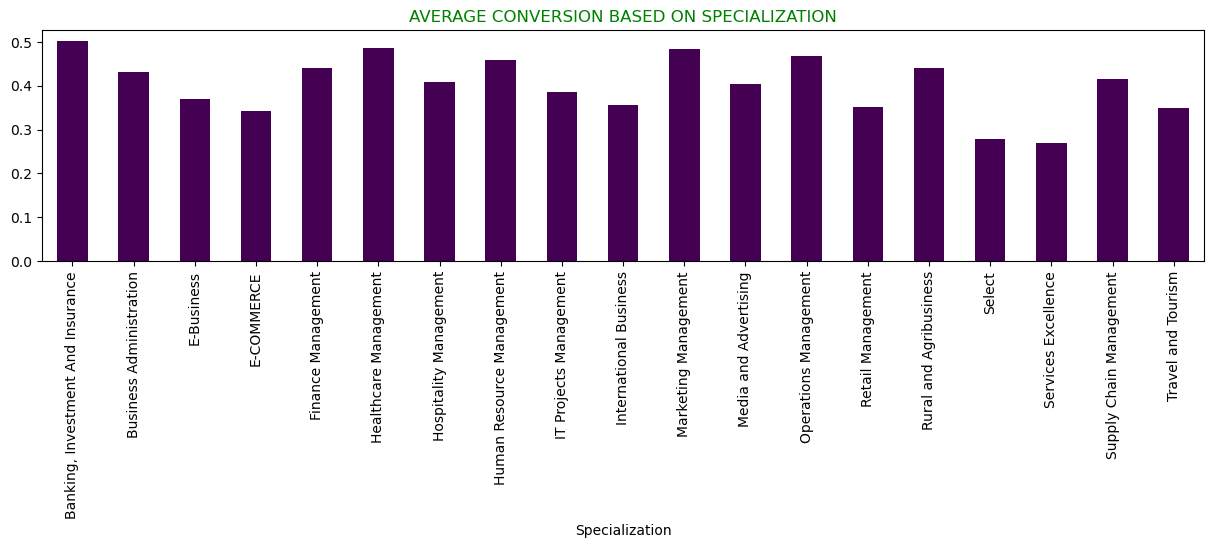

In [64]:
# ANALYSING RELATION BETWEEN SPECIALIZATION AND CONVERTED
plt.figure(figsize = (15,3))
lead.groupby(by = ['Specialization']).mean()['Converted'].plot(kind = 'bar' , colormap = 'viridis')
plt.title('AVERAGE CONVERSION BASED ON SPECIALIZATION' , fontdict = {'color': 'green'})
plt.xticks(rotation = 90)
plt.show()

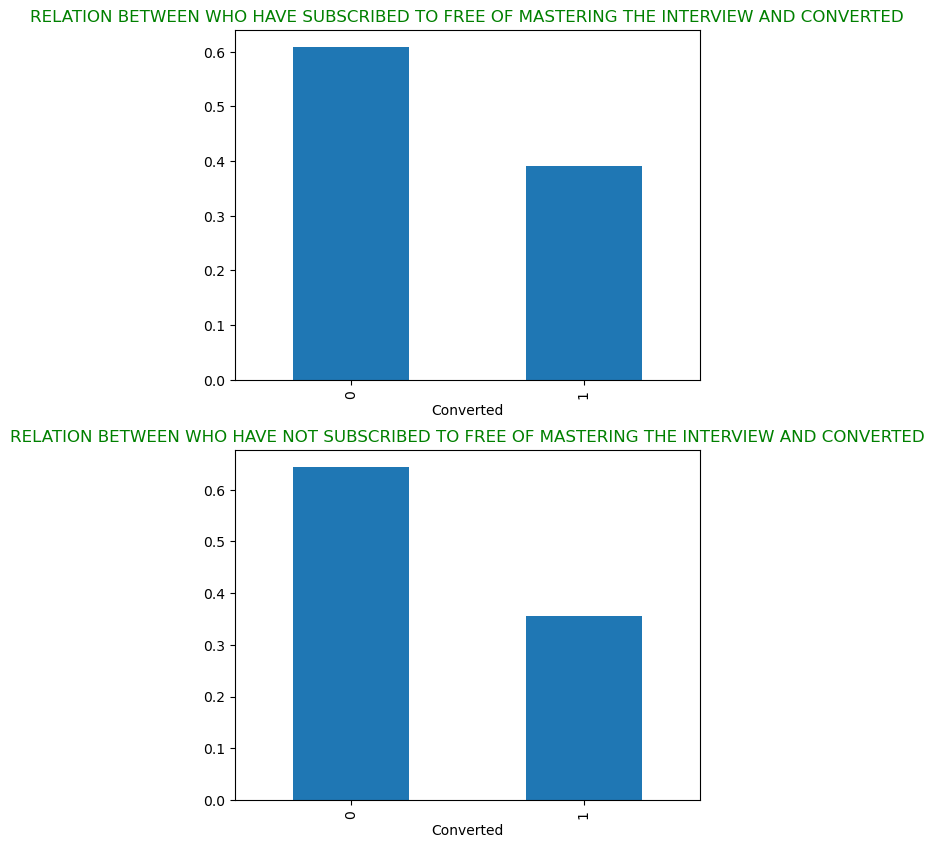

In [65]:
# ANALYSING RELATION BETWEEN A FREE COPY OF MASTERING THE INTERVIEW AND CONVERSION RATE
data = lead.groupby(by = ['A free copy of Mastering The Interview' ,'Converted' ]).count()['Lead Origin']/lead.groupby(by = ['A free copy of Mastering The Interview' ]).count()['Lead Origin']
plt.figure(figsize = (6,10))
plt.subplot(2,1,1)

data.loc[('No')].plot(kind = 'bar')
plt.title('RELATION BETWEEN WHO HAVE SUBSCRIBED TO FREE OF MASTERING THE INTERVIEW AND CONVERTED' , fontdict = {'color': 'green'})


plt.subplot(2,1,2)
data.loc[('Yes')].plot(kind = 'bar')
plt.title('RELATION BETWEEN WHO HAVE NOT SUBSCRIBED TO FREE OF MASTERING THE INTERVIEW AND CONVERTED' , fontdict = {'color': 'green'})
plt.show()

##### NOTES
1. Compared to those who have not 

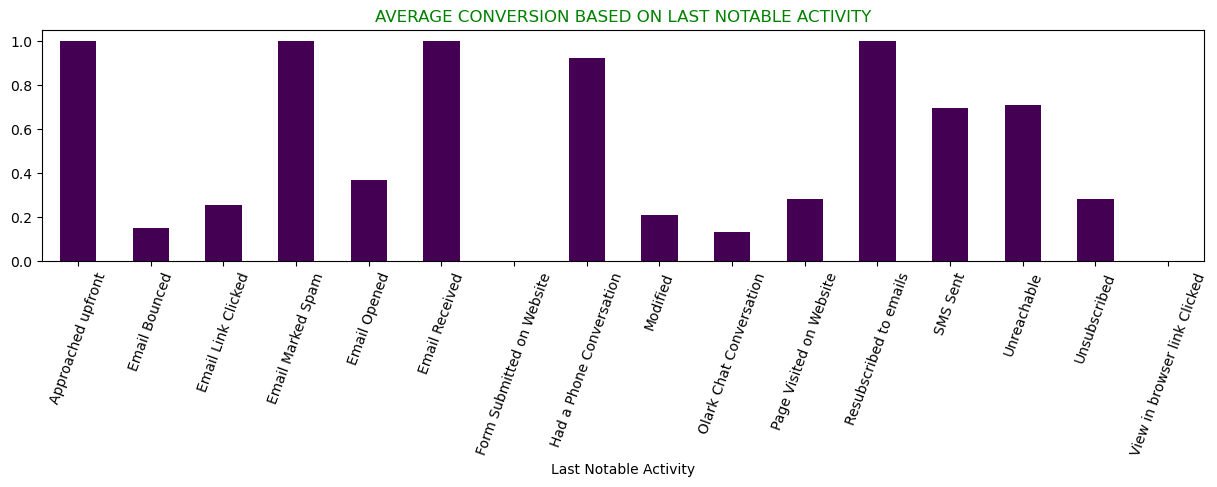

In [66]:
plt.figure(figsize = (15,3))
lead.groupby(by = ['Last Notable Activity']).mean()['Converted'].plot(kind = 'bar' , colormap = 'viridis')
plt.title('AVERAGE CONVERSION BASED ON LAST NOTABLE ACTIVITY' , fontdict = {'color': 'green'})
plt.xticks(rotation = 70)
plt.show()

In [67]:
lead[lead['Last Activity']==lead['Last Notable Activity']][['Last Activity','Last Notable Activity' ]].count()

Last Activity            5668
Last Notable Activity    5668
dtype: int64

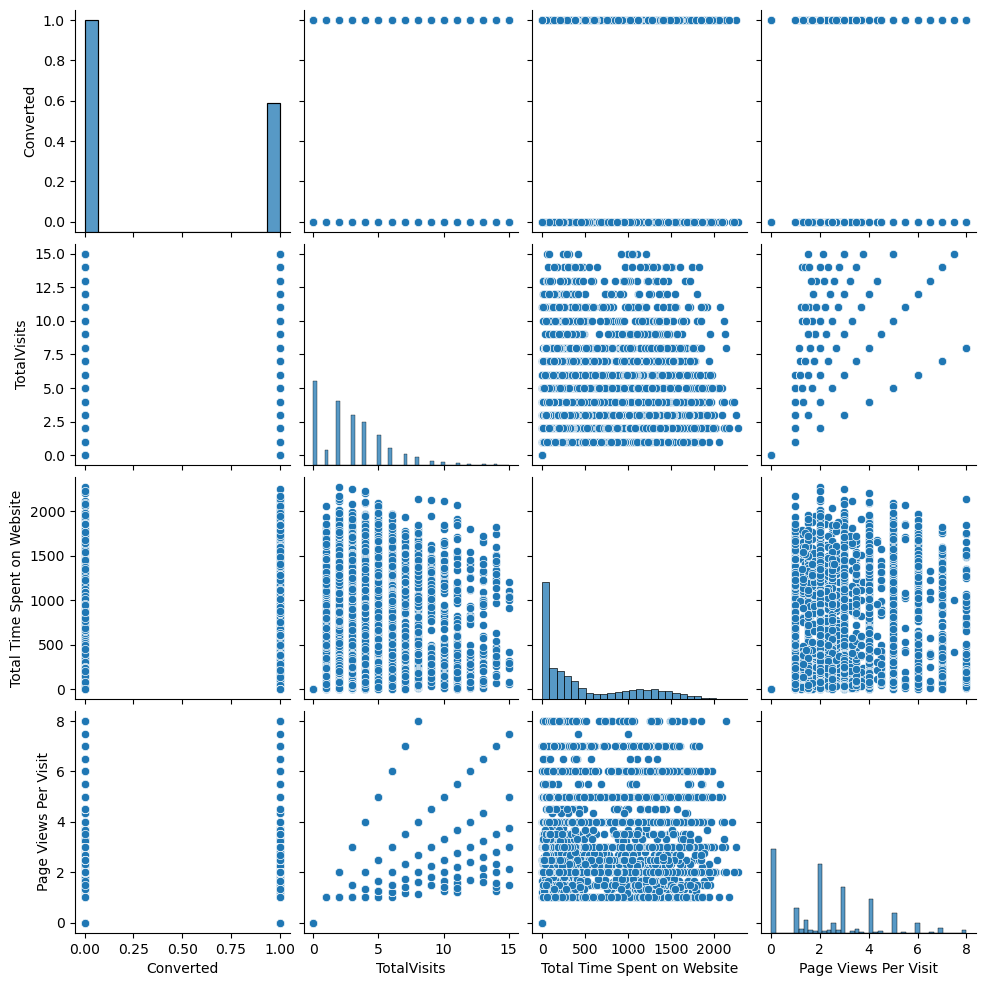

In [68]:
# PREPARING A PAIRPLOT 
sns.pairplot(lead)
plt.show()

##### NOTES
1. An impressive conversion rate of over 80% is observed among leads originating from the Lead Add Form, highlighting its effectiveness in generating successful conversions.

2. Lead sources, including Live Chat, NC_EDM, Reference, and We Learn, stand out by producing a maximum number of converted leads, indicating their potential as valuable lead generation channels.

3. Notably, converted leads tend to exhibit higher website visitation rates and spend more time on the website, indicating a positive correlation between engagement and conversion.

4. Last notable activities such as receiving emails, engaging in phone conversations, and resubscribing to emails are associated with significantly higher average conversion rates, emphasizing their influence in driving conversions.

#   <FONT COLOR = 'BROWN' > 5. PREPARING THE DATA FOR MODELLING </FONT>

In [69]:
# checking do not email column
lead['Do Not Email'] = lead['Do Not Email'].map({'No' : 0 , 'Yes' : 1})

In [70]:
# getting information about the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8874 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8874 non-null   object 
 1   Lead Source                             8874 non-null   object 
 2   Do Not Email                            8874 non-null   int64  
 3   Converted                               8874 non-null   int64  
 4   TotalVisits                             8874 non-null   float64
 5   Total Time Spent on Website             8874 non-null   int64  
 6   Page Views Per Visit                    8874 non-null   float64
 7   Last Activity                           8874 non-null   object 
 8   Specialization                          8874 non-null   object 
 9   A free copy of Mastering The Interview  8874 non-null   object 
 10  Last Notable Activity                   8874 non-null   obje

In [71]:
# CREATING DUMMY VARIABLES
lead = pd.get_dummies(data = lead ,  columns = ['Lead Origin','Lead Source','Last Activity' , 'Specialization' , 'A free copy of Mastering The Interview' ,
                    'Last Notable Activity' ], prefix = None , drop_first= True)

In [72]:
# checking numerical columns in the dataframe
lead[['Do Not Email' , 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0.0,0,0.0
1,0,0,5.0,674,2.5
2,0,1,2.0,1532,2.0
3,0,0,1.0,305,1.0
4,0,1,2.0,1428,1.0


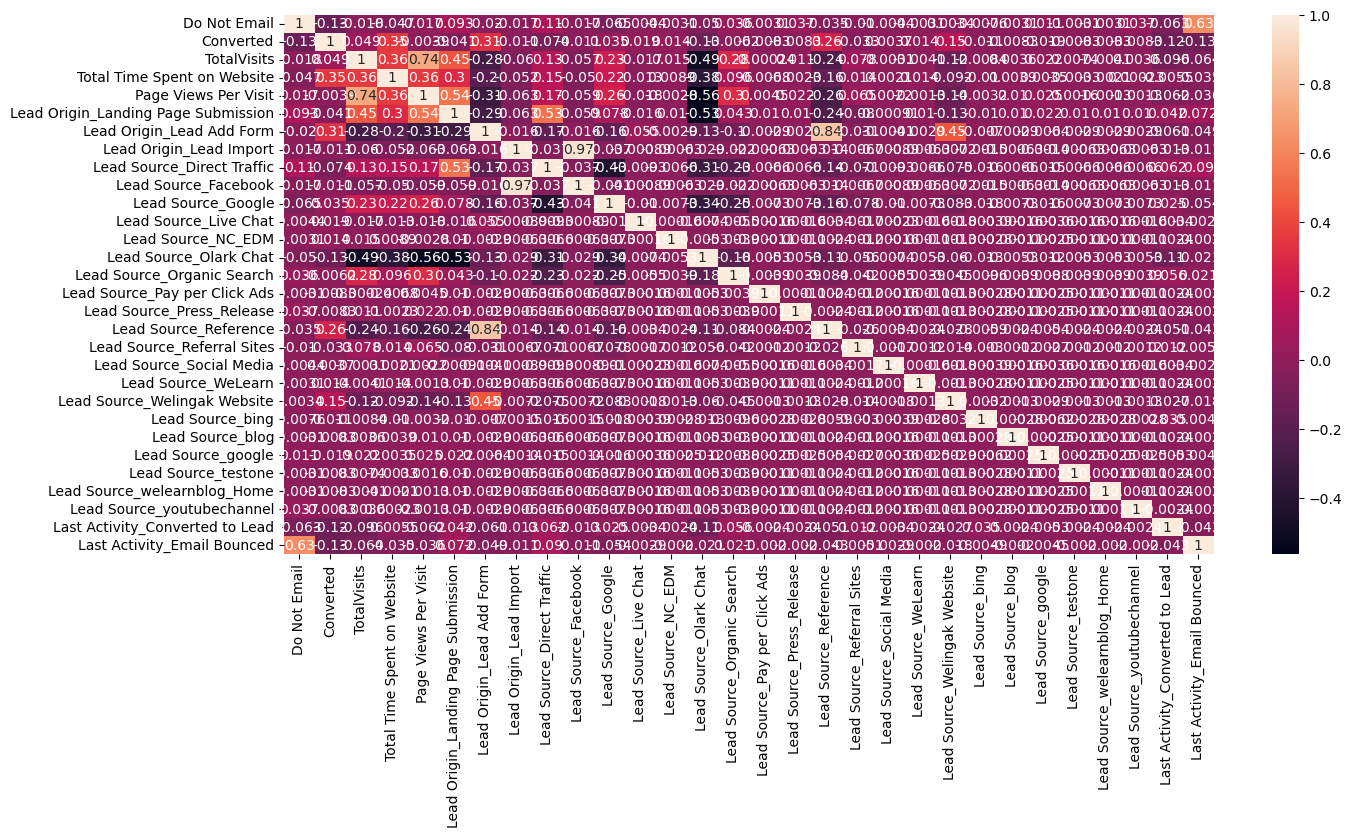

In [73]:
plt.figure(figsize = (15,7))
sns.heatmap(lead.iloc[ : , :30 ].corr() , annot  = True)
plt.show()

In [74]:
# Splitting the data into test and train
X = lead.drop(['Converted' ], axis = 1)
y = lead['Converted']
X_train , X_test , y_train, y_test = train_test_split(X , y , train_size= 0.7 , random_state= 13)

In [75]:
# checking the shape of the test and train data
print(f'X_train.shape : {X_train.shape}')
print(f'X_test.shape : {X_test.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'y_test.shape : {y_test.shape}')

X_train.shape : (6211, 77)
X_test.shape : (2663, 77)
y_train.shape : (6211,)
y_test.shape : (2663,)


In [76]:
# STANDARDIZATION OF NUMERICAL VALUES
scalar = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scalar.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [77]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scalar.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]) 

In [78]:
# describe the X_train
X_train.iloc[:  , :20].describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn
count,6211.000000,6.211000e+03,6.211000e+03,6.211000e+03,6211.000000,6211.000000,6211.000000,6211.000000,6211.000000,6211.000000,6211.000000,6211.0,6211.000000,6211.000000,6211.0,6211.000000,6211.000000,6211.000000,6211.000000,6211.0
mean,0.077443,-8.401301e-19,-1.997722e-16,5.097981e-17,0.522299,0.070681,0.003059,0.276606,0.003059,0.318306,0.000161,0.0,0.202222,0.118177,0.0,0.000161,0.051844,0.011592,0.000322,0.0
std,0.267315,1.000081e+00,1.000081e+00,1.000081e+00,0.499543,0.256312,0.055229,0.447356,0.055229,0.465857,0.012689,0.0,0.401689,0.322844,0.0,0.012689,0.221729,0.107050,0.017943,0.0
min,0.000000,-1.091673e+00,-8.637416e-01,-1.204040e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,-1.091673e+00,-8.637416e-01,-1.204040e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,-8.314295e-03,-4.340110e-01,-9.915746e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,3.528052e-01,7.699755e-01,4.532837e-01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,4.325120e+00,3.309461e+00,3.215490e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
X_train.iloc[:  , 20:40].describe()

In [ ]:
X_train.iloc[:  , 40:60].describe()

In [ ]:
X_train.iloc[:  , 60:78].describe()

In [ ]:
X_train.info()

#   <FONT COLOR = 'BROWN' >6. MODEL BUILDING </FONT>

### <FONT COLOR = 'PURPLE'> BUILDING FIRST MODEL USING ALL INDEPENDENT VARIABLES </FONT>

In [ ]:
# adding constant to the X_train
X_train_sm = sm.add_constant(X_train)

In [ ]:
lr = sm.GLM(y_train , X_train_sm  , family= sm.families.Binomial())
lr.fit().summary()

### <FONT COLOR = 'PURPLE'> SELECTION OF TOP 15 FEATURES USING RFE </FONT>

In [ ]:
# selection of top 15 features using RFE
logreg = LogisticRegression()
rfe = RFE(estimator= logreg , n_features_to_select= 15)
rfe = rfe.fit(X_train , y_train)

In [ ]:
# feature selection
list (zip(X_train.columns  , rfe.support_ , rfe.ranking_))

In [ ]:
# top 15 columns 
columns = X_train.columns[rfe.support_]
print(len(columns))
columns

### <FONT COLOR = 'PURPLE'> MODEL BUILDING USING TOP 15 FEATURES </FONT>

In [ ]:
X_train = X_train[columns]
X_train_sm = sm.add_constant(X_train)

In [ ]:
X_train_sm.shape

In [ ]:
# building model 
lr = sm.GLM(y_train , X_train_sm  , family= sm.families.Binomial())
model = lr.fit()
model.summary()

In [ ]:
# checking the interrelation between independent variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### NOTES 
It can be observed that Lead Source_Welingak Website Opened and Last Notable Activity_Had a Phone Conversation has a high p  value of 0.999 and 0.992 each respectively.

##### ACTION
Decided to remove the column Lead Source_Welingak Website

In [ ]:
X_train = X_train.drop(['Lead Source_Welingak Website']  , axis = 1 )
X_train_sm = sm.add_constant(X_train)

### <FONT COLOR = 'PURPLE'> MODEL BUILDING USING TOP 14 FEATURES </FONT>

In [ ]:
X_train.shape

In [ ]:
# building model 
lr = sm.GLM(y_train , X_train_sm  , family= sm.families.Binomial())
model = lr.fit()
model.summary()

In [ ]:
# checking the interrelation between independent variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### NOTES 
It can be observed that Last Notable Activity_Had a Phone Conversation  has a high  P value of 91.2

##### ACTION
Decided to remove the column Last Notable Activity_Had a Phone Conversation

In [ ]:
X_train = X_train.drop(['Last Notable Activity_Had a Phone Conversation']  , axis = 1 )
X_train_sm = sm.add_constant(X_train)

### <FONT COLOR = 'PURPLE'> MODEL BUILDING USING TOP 13 FEATURES </FONT>

In [ ]:
X_train.shape

In [ ]:
# building model 
lr = sm.GLM(y_train , X_train_sm  , family= sm.families.Binomial())
model = lr.fit()
model.summary()

In [ ]:
# checking the interrelation between independent variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### NOTES 
It can be observed that Last Activity_Email Opened  has a high  vif of 8.05

##### ACTION
Decided to remove the column Last Activity_Email Opened

In [ ]:
X_train = X_train.drop(['Last Activity_Email Opened']  , axis = 1 )
X_train_sm = sm.add_constant(X_train)

### <FONT COLOR = 'PURPLE'> MODEL BUILDING USING TOP 12 FEATURES </FONT>

In [ ]:
X_train.shape

In [ ]:
# building model 
lr = sm.GLM(y_train , X_train_sm  , family= sm.families.Binomial())
model = lr.fit()
model.summary()

In [ ]:
# checking the interrelation between independent variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### NOTES 
It can be observed that Last Notable Activity_Email Opened  has a high  p value of 88.0

##### ACTION
Decided to remove the column Last Notable Activity_Email Opened

In [ ]:
X_train = X_train.drop(['Last Notable Activity_Email Opened']  , axis = 1 )
X_train_sm = sm.add_constant(X_train)

### <FONT COLOR = 'PURPLE'> MODEL BUILDING USING TOP 11 FEATURES </FONT>

In [ ]:
X_train.shape

In [ ]:
# building model 
lr = sm.GLM(y_train , X_train_sm  , family= sm.families.Binomial())
model = lr.fit()
model.summary()

In [ ]:
# checking the interrelation between independent variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

##### NOTES
The selected features have p-values < 5 and VIF < 5.

In [ ]:
vif.Features.values


The final independent variables are Specialization_Select , Lead Source_Olark Chat,
       Last Notable Activity_Modified ,
       Lead Origin_Landing Page Submission ,
       Last Activity_Olark Chat Conversation , Last Activity_SMS Sent,
       Total Time Spent on Website , Lead Origin_Lead Add Form,
       Do Not Email, Last Notable Activity_Unsubscribed,
       Last Activity_Had a Phone Conversation

#   <FONT COLOR = 'BROWN' >7. MODEL EVALUATION  </FONT>

### <FONT COLOR = 'PURPLE'> MODEL EVALUATION BASED ON RANDOM CUT-OFF POINT 50</FONT>

In [ ]:
# evaluating the model based on random cut-off point of 50
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':model.predict(X_train_sm)*100})
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50 else 0)
y_train_pred_final.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# THE CONFUSION MATRIX

#    Predicted    not_converted      coverted
#     Actual
#  not_converted        3377           473
#   converted           738            1623 

In [ ]:
# FINDING THE OVERALL ACCURACY 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
# FINDING OTHER EVALUATION MATRICS SUCH AS SPECIFICITY, SENSITIVITY , 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# specificity of our logistic regression model
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### <FONT COLOR = 'PURPLE'> PLOTTING THE ROC CURVE </FONT>

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('RECEIVER OPERATING CHARACTERISTIC (ROC) ')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score/100)

### <FONT COLOR = 'PURPLE'> FINDING THE OPTIMAL CUT-OFF POINT </FONT>

Optimal cut-off probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x) for x in range(10 , 100 , 2)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [x for x in range(10 , 100 , 2)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('TRADE OFF BETWEEN SENSITIVITY , SPECIFICITY AND ACCURACY' , fontdict = {'color' : 'green'})
plt.show()

##### NOTES
 From the curve above, 40 is the optimum point to take it as a cutoff probability.

In [ ]:
# evaluating the model based on optimal cut-off point 40
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':model.predict(X_train_sm)*100})
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 40 else 0)
y_train_pred_final.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# THE CONFUSION MATRIX

#    Predicted    not_converted      coverted
#     Actual
#  not_converted        3193           657
#   converted           546            1815  

In [ ]:
# FINDING THE OVERALL ACCURACY 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
# FINDING OTHER EVALUATION MATRICS SUCH AS SPECIFICITY, SENSITIVITY , 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)


In [ ]:
# specificity of our logistic regression model
TN / float(TN+FP)


In [ ]:
# Calculate false postive rate 
print(FP/ float(TN+FP))



In [ ]:
# positive predictive value 
print (TP / float(TP+FP))



In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

### <FONT COLOR = 'PURPLE'> FROM THE POINT OF VIEW OF RECALL AND PRECISION </FONT>

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted , y_train_pred_final.Lead_Score/100)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('RECALL-PRECISION RELATIONSHIP BASED ON CUT-OFF POINT' , fontdict = {'color' : 'green'})
plt.show()

In [ ]:
# computing the precision_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [ ]:
# computing the recall_Score
recall_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

In [ ]:
# F1 SCORE
(2 * 0.7342233009708737 *0.7687420584498094)/(0.7342233009708737+ 0.7687420584498094 )

##### NOTES
1. Recall-precision relation also suggest that the optimal cut-off point is 40.

#   <FONT COLOR = 'BROWN' >8. MODEL VALIDATION  </FONT>

In [ ]:
# preparing the data
X_test = X_test[X_train.columns]
X_test_sm = sm.add_constant(X_test)

In [ ]:
# evaluating the model based on optimal cut-off point 40
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Lead_Score':model.predict(X_test_sm)*100})
y_test_pred['predicted'] = y_test_pred.Lead_Score.map(lambda x: 1 if x > 40 else 0)
y_test_pred.head()

In [ ]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.predicted )
print(confusion)

In [ ]:
# THE CONFUSION MATRIX

#    Predicted    not_converted      coverted
#     Actual
#  not_converted        1364           293
#   converted           226            780 

In [ ]:
# FINDING THE OVERALL ACCURACY 
print(metrics.accuracy_score(y_test_pred.Converted, y_test_pred.predicted))

In [ ]:
# FINDING OTHER EVALUATION MATRICS SUCH AS SPECIFICITY, SENSITIVITY , 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN) *100


In [ ]:
# specificity of our logistic regression model
TN / float(TN+FP) *100


In [ ]:
# Calculate false postive rate 
print(FP/ float(TN+FP) *100) 



In [ ]:
# positive predictive value 
print (TP / float(TP+FP)*100) 



In [ ]:
# Negative predictive value
print (TN / float(TN+ FN) *100) 

In [ ]:
# computing the precision_score
precision_score(y_test_pred.Converted, y_test_pred.predicted)

In [ ]:
# computing the recall_Score
recall_score(y_test_pred.Converted, y_test_pred.predicted)

In [ ]:
# F1 SCORE
(2 * 0.7269338303821062 *0.7753479125248509)/(0.7269338303821062  + 0.7753479125248509 )

### SUMMARY

The model developed will play a pivotal role in revolutionizing X Education's lead conversion strategy. By assigning lead scores to incoming prospects, it provides a clear roadmap for the sales team, allowing them to prioritize their interactions with leads that exhibit a high likelihood of conversion. This targeted approach will not only optimize resource allocation but also improve the overall efficiency of the sales process. With a more data-driven and predictive system in place, X Education is poised to achieve its ambitious goal of increasing the lead conversion rate from the current 30% to the desired 80%. The model's reliability, after rigorous evaluation and validation, ensures that it will be a valuable asset for the company, propelling it toward a new level of success in the online education industry.





